<a href="https://colab.research.google.com/github/VieiraJardel/Data_Science/blob/main/Outubro_Rosa_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outubro Rosa e Machine Learning: Modelo para a Detecção de Câncer de Mama

<center><img src="https://github.com/VieiraJardel/Data_Science/blob/main/Picture2.png?raw=true"></center>

**MOTIVAÇÃO**

A fim de aumentar a conscientização a respeito da prevenção e diagnóstico precoce, há todo ano a campanha [Outubro Rosa](http://www.outubrorosa.org.br/objetivo.htm), que visa alertar principalmente as mulheres sobre esta causa. Para dar alguma contribuição a esse movimento decidi fazer esse artigo sobre interpretação de Machine learning usando um dataset classico sobre um diagnostico de cancer de mama para indicar se um tumor é benigno ou maligno.



**INTRODUÇÃO**

A utilização de *Machine Learning* para a detecção do câncer de mama vem crescendo cada vez mais, e contribuído para diagnósticos mais rápidos e precisos.

[De acordo com a Sociedade Brasileira de Mastologia](https://noticias.r7.com/saude/uma-em-cada-12-mulheres-recebera-diagnostico-de-cancer-de-mama-02102019), uma em cada 12 mulheres terá um tumor nas mamas até os 90 anos. Infelizmente, [o câncer de mama é a principal causa de morte entre as mulheres](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6468737/), de todos os diferentes tipos de câncer.

Uma das principais características do câncer de mama é que quanto mais precoce for o seu diagnóstico, maiores são as chances de tratamento. Entretanto, uma pesquisa realizada revelou que mais de 3,8 milhões de mulheres na faixa de 50 a 69 anos nunca haviam feito autoexame ou mamografia.

**PROPOSTA DO ARTIGO**

Você entende como as variáveis de um modelo de machine learning estão influenciando as suas previsões? 

Vamos usar uma ferramenta fascinante para entender as relações que o modelo aprendeu entre as variáveis de entrada e o alvo, além de conseguir entender também o que está influenciando a previsão de cada exemplo. Isso é imortante não só para entender o modelo, mas também para obter conhecimento sobre a área que estamos modelando.

O modelo de Machine Learning não é apenas para prever, ele pode ser uma ferramenta de descoberta para entender melhor o problema que esta sendo modelado.

##Dataset de dados

Para a construção do modelo de *Machine Learning* foi usado o banco de dados Wisconsin, disponibilizado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). O conjunto de dados aqui utilizados foi encontarado no [Kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016)  e traz informações sobre diagnosticos de exames de mamas.

O dataset consiste em um arquivo csv contendo 569 entradas e 32 colunas. As características desse banco de dados são computadas a partir de uma imagem digitalizada da aspiração por agulha fina (PAAF) que trata-se de um tipo de biópsia realizada com uma pequena agulha (calibre 21 a 25) para obter amostras de tecido e líquido a partir de lesões sólidas ou císticas. Eles descrevem características dos núcleos celulares presentes na imagem.

In [ ]:
#Baixar biblioteca shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.2 MB/s 


In [ ]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import shap

from sklearn.model_selection import train_test_split #função que divide os dados
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report #fornece relatorio com boa interpretação do que o modelo esta fazendo

# configurar o notebook
sns.set_style()

%matplotlib inline
shap.initjs() #Comando para ver os gráficos

Vamos importar o dataser e ver as primairas 5 entradas. Elas nos permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipóteses iniciais do processo investigativo.

In [ ]:
#Importar dataset
df = pd.read_csv("https://www.dropbox.com/s/z8nw6pfumdw3bb9/breast-cancer-wisconsin.csv?raw=1")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Vamos eliminar a coluna Unnamed já que ela não possui nenhum valor
df.drop('Unnamed: 32', axis=1, inplace=True)

## Análise Exploratória

A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

* A coluna `id` representa o número de identificação.
* A coluna `diagnosis` é a variável alvo.
  * **M -** *Maligno*
  * **B -** *Benigno*
* A descrição completa para cada uma das *features* está disponível [neste link](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).


Uma característica é um número de identificação (ID), outro é o diagnóstico de câncer, e 30 são medidas laboratoriais numéricas. O diagnóstico é codificado como “M” para indicar maligno ou “B” para indicar benigno.

In [ ]:
#Dimensões do DF
print ('DIMENSÕES DO DATAFRAME')
print('Linhas:\t\t{}'.format(df.shape[0]))
print('Colunas:\t{}'.format(df.shape[1]))

DIMENSÕES DO DATAFRAME
Linhas:		569
Colunas:	32


Através do describe podemos ver um resumo estatistico das variáveis.

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Com exceção da coluna `diagnosis`, todas as outras são do tipo numérica (`int` e `float`). Apesar dessa ser a nossa conclusão olhando as primeiras entradas, é prudente analisar por meio do atributo `dtypes` para ter certeza que nenhuma foi importada como `string`.

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Como em qualquer projeto de Data Science, a verificação da presença de valores ausentes no dataset é de extrema importância, pois é o reflexo direto da qualidade do mesmo.

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Agora irei verificar o balanceamento do dataset vendo a porcentagem de valores da variável alvo. Como se pode ver abaixo, existem um pequeno desbalanceamento de valores.

Diagnosticos:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


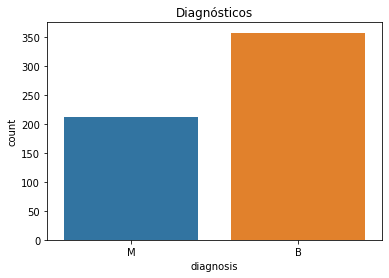

In [ ]:
#Ver porcentagem dos diagnosticos
print("Diagnosticos:")
print(df.diagnosis.value_counts()/ df.shape[0])

#Plotar Gráfico de barras com os diagnósticos
fig, ax = plt.subplots()
sns.countplot('diagnosis', data=df, ax=ax)
ax.set_title('Diagnósticos')
plt.show()

Para ter a noção de como as variáveis estão distribuídas, vou plotar o histograma de todas as variáveis numéricas, excluindo a coluna `id`, uma vez que ela Não acrescenta nenhuma informação importante.

Preste sempre atenção em como os valores de algumas variáveis estão mais bem distribuídos em torno de uma média e outras tendem a puxar o histograma para a esquerda.

To output multiple subplots, the figure containing the passed axes is being cleared


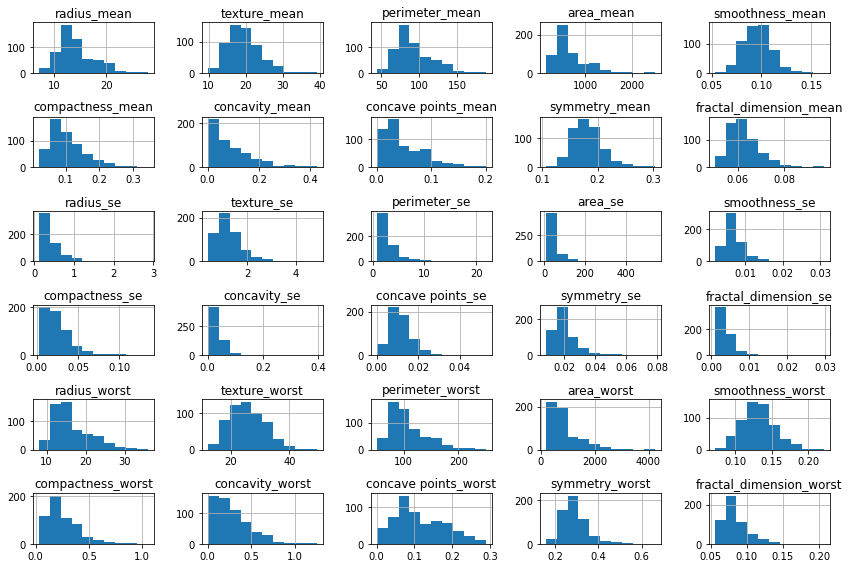

In [ ]:
# plotar o histograma das features
fix, ax = plt.subplots(figsize=(12,8))
df.drop('id', axis=1).hist(ax=ax)
plt.tight_layout()

Para ver a força da correlação entre as variáveis, uma opção é plotar um heatmap. Repare no mapa abaixo como diversas variáveis possuem correlação positiva.

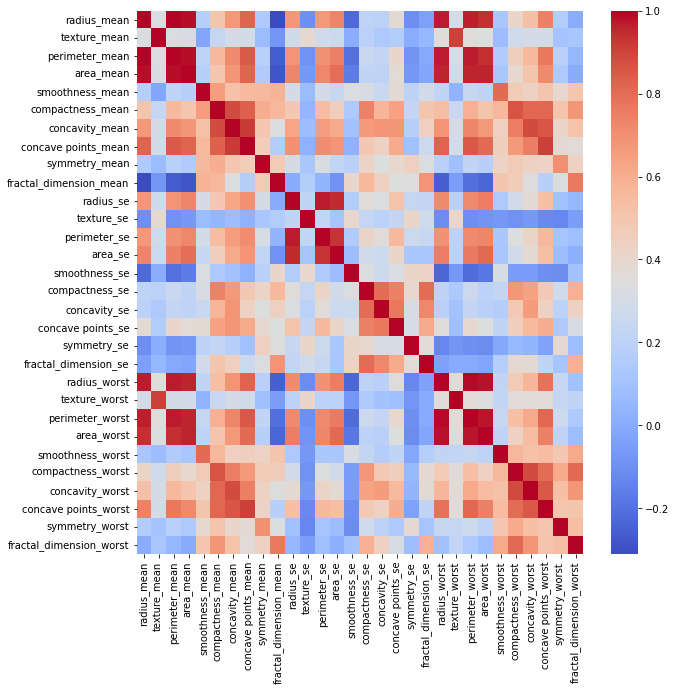

In [ ]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.drop('id', axis=1).corr(), cmap='coolwarm', ax=ax)
plt.show()

## Preparação dos dados

Como parte do pré-processamento dos dados, que irão alimentar o modelo de *Machine Learning*, vou usar o `StardardScaler`, que vem junto com `sklearn.preprocessing`, para padronizar nossos dados numéricos.

Se você olhar no começo do código, vai reparar que a nossa variável alvo é categórica, onde *M* representa os tumores malignos e *B* os benignos. Usando `LabelEncoder` somos capazes de converter variáveis categóricas em numéricas e alimentar o modelo adequadamente.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# separar as variáveis independentes da variável alvo
X = df.drop(['diagnosis', 'id'], axis=1)
y = df['diagnosis']

# padronizar as colunas numéricas
X = StandardScaler().fit_transform(X)

# label encoder na variável alvo
y = LabelEncoder().fit_transform(y)

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Vale destacar que o cálculo utilizar por `StandardScaler` para calcular os *scores* é $z = \frac{x-u}{s}$, onde $u$ é a média das amostras do conjunto de treino e $s$ é o desvio padrão dessa amostra.

Por fim, antes de construir o modelo de fato, dividimos o *dataset* entre treino e teste usando o `train_test_split`, função que facilitar muito o trabalho, e que se encontra em `sklearn.model_selection`.

# Modelo de Machine Learning para detecção do câncer de mama

Este problema de detecção de câncer consiste em classificar corretamente um tumor entre benigno e maligno, ou seja, é necessário que o modelo de *Machine Learning* dê uma classificação ao ser alimentado com diversas variáveis independentes (*features*).

Aqui, usarei um modelo do tipo *Random Forest* (Floresta Aleatória) devido à sua flexibilidade e facilidade de uso (uma vez que funciona muito bem mesmo sem o ajuste nos hiperparâmetros).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instanciando o modelo de Random Forest
ml_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  random_state = 42)

# treinando o modelo 
ml_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

O algoritmo *Random Forest*, que usa métodos *ensemble*, tem esse nome por que cria uma combinação de várias árvores de decisão - uma "floresta" realmente - verificando qual combinação apresenta melhor desempenho e acurácia.

Vamos dar uma checada no desempenho do modelo quando se depara pela primeira vez com o conjunto de testes.

## Desempenho do modelo de detecção de câncer de mama

Cada caso é um caso. Nem sempre uma excelente acurácia vai significar que seu modelo está bom. 

Por exemplo, quando se trata de detectar câncer, queremos maximizar o número de verdadeiros positivos e minimizar o número de falsos negativos. No entanto, esta é uma balança difícil de equilibrar, e o *trade-off* pode ser bem subjetivo inclusive.

Aqui, além da métrica de acurácia vou usar a função `classification_report` para ver ver o desempenho do modelo sobre as métricas de precisão, *recall*, *f1-score* e *support*.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# realizar as previsões no dataset de teste
y_pred = ml_model.predict(X_test)

# ver acurácia geral
print('[Acurácia] Random Forest:', accuracy_score(y_test, y_pred))

# imprimir o classification report
print('\n[Classification Report] Random Forest')
print( classification_report(y_test, y_pred) )

[Acurácia] Random Forest: 0.9473684210526315

[Classification Report] Random Forest
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.95      0.91      0.93        64

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



Aparentemente, o modelo está com ótimos valores nas métricas consideradas. Mas como eu disse lá em cima, cada caso é um caso.

Eu acho muito interessante você sempre dar uma checada na matriz de confusão. Para exemplificar, imagine que seu modelo é capaz de detectar com 99,999% de acurácia sempre que um paciente não apresenta um tumor maligno, mas apenas 85% de acurácia quando prevê que o mesmo paciente apresentar esse tumor maligno.

Há vezes em que é melhor ter mais falsos positivos e investigar mais profundamente o caso (como também é o caso de fraudes no cartão de crédito), e ter um modelo menos preciso. 

In [ ]:
# plotar a matriz de confusão
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,104,3
pos,6,58


Como você pode confirmar, o modelo classificatório Random Forest foi capaz de atingir uma acurácia superior a 96% e lidou muito bem com ambas as classes.

## Outubro Rosa e Machine Learning

Apesar da campanha Outubro Rosa ser em Outubro, a conscientização deve existir durante o ano todo. A importância de um dianóstico precoce do câncer de mama deve estar clara na cabeça de todo mundo. 

Avanços e descobertas no campo da Inteligência Artificial ocorrem a todo momento, principalmente na área da saúde. Deteccção de Câncer por meio de algoritmos de <em>Machine Learning</em> ajudam cada vez mais os médicos a diagnosticarem seus pacientes, aumentando drásticamente as chances dos tratamentos concencionais.

No entanto, mesmo a construção de modelos altamente confiáveis para a detecção de câncer de mama não substitui uma variável, a principal <em>feature</em>, o diagnóstico precoce ;)

Espero ter contribuido um pouco com a causa, apresentando um modelo 100% replicável por qualquer pessoa (basta abrir o código no [Google Colab](https://colab.research.google.com) e executar cada linha.

Vamos pegar as feactures que possuem valor médio. Isso irá reduzir a quantidade de variaveis, possuiremos um dataset com 10 colunas.

In [ ]:
#Pegar colunas com _mean
features = df.filter(regex=r"_mean", axis=1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Iremos selecionar a coluna diagnosis e fazer um mapa de 0 e 1. M = 0 e B = 1.

In [ ]:
#Atribuindo valores a M e B
y = df['diagnosis'].map({'M': 0, 'B': 1})

#Verificar quantidade de itens
y.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

Antes de construir o modelo de fato, dividimos o dataset entre treino e teste usando o train_test_split, função que facilitar muito o trabalho, e que se encontra em sklearn.model_selection.

In [ ]:
#Divisão dos dados em treino e validação
Xtrain, Xval, ytrain, yval = train_test_split(features, y, train_size=0.5)

In [ ]:
#Verificando
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((284, 10), (285, 10), (284,), (285,))

In [ ]:
mdl = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
mdl.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

Podemos ver abaixo um relatório gerado. O precision indica a porcentagem de quanto o modelo acertou de cada classe. O recall é uma métrica que indica a taxa de detecção. O f1-score mostra a média harmonica entre os dois valores (0 e 1). Support indica a quantidade de eemplos.

Temos uma quantidade pequena de exemplos, mas podemos ter uma ideia do modelo e até nos satisfazermos com as previsões dele.Ele se mostrou bom o bastante para ser utilizado em um ambiante de imterpretação

In [ ]:
p = mdl.predict(Xval)
print(classification_report(yval, p))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       106
           1       0.94      0.95      0.95       179

    accuracy                           0.93       285
   macro avg       0.93      0.93      0.93       285
weighted avg       0.93      0.93      0.93       285



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(yval, p), 
             index=['neg', 'pos'], columns=['pred_neg', 'pred_pos'])

,pred_neg,pred_pos
neg,96,10
pos,9,170


Para interpretarmos o modelo iremos utilizar a biblioteca shap.

Ela consegue criar um interpretador para qualquer modelo, além de possui maneiras para entender os dados.

In [ ]:
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xtrain) #Xtrain foram os dados usados para criar o modelo, é mais lógico o utilizar para entender o modelo

In [ ]:
#é um objeto do shap
explainer

In [ ]:
#lista de 2 arrays. Cria para cada exemplo(feature) um valor
shap_values[1].shape 

(284, 10)

Vamos pegar o expect_value que é a previsão média dos dados e vamos passar as colunas da matriz do shap values e todas as colunas da matriz de treino, todas as features 

Temos uma lista com 2 matrizes, cada matriz mostra a possibilidade de classe de cada exemplo (0 ou 1). 

A matriz mais importante é a de classe 1, nela analisaos a possibilidade do cancer ser benigno.



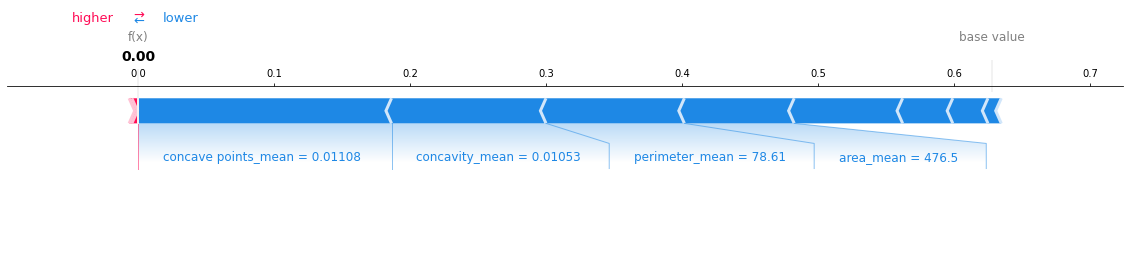

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][10,:], Xtrain.iloc[0,:], matplotlib=True)

No prmeiro exemplo vemos que a possibilidade é zero de ser da classe 1, ou seja benigno. Por que ele teve essa possibilidade? podemos ver essa justificativa com a representação de cada feature indicando os valores de porque ele passou da valor base 0.6 para 0.0, conforme o modelo visualiza as features ele reduz a probabilidade

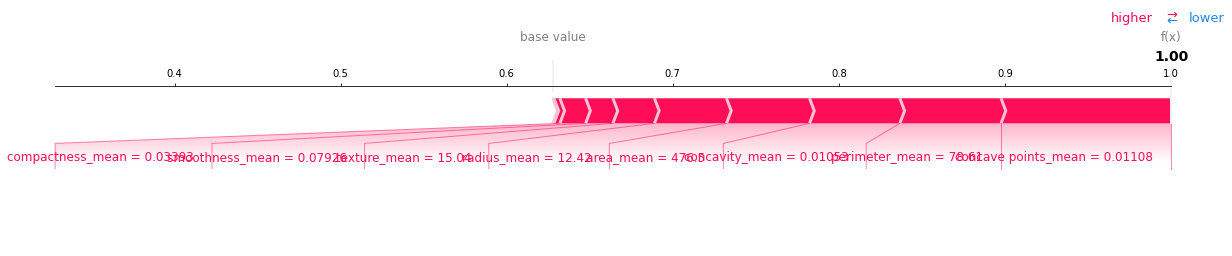

In [ ]:
#Analisando outro exemplo
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], Xtrain.iloc[0,:], matplotlib=True)

Vendo outro exemplo pode-se observar a probabilidade de 100% de o cancer ser benigno. As features perimeter_mean e concave points_mean influenciaram no aumento dessa probabilidade aumentando o score de pouco mais de 0.7 para 1.

Em diagnosticos é extremamente importante dizer porque o modelo tomou certa decisão, devido a isso é muito importante ter um método como este que explica para um exemplo especifico o que foi mais importante para indicar uma resposta.

In [ ]:
#Outra visão dos dados
shap.force_plot(explainer.expected_value[1], shap_values[1], Xtrain, matplotlib=True)

NotImplementedError: ignored

Podemos ver para cada exemplo as previsões com o force_plot. Esse recurso possui várias sequencias possíveis de se ordenar.
Vemos no eixo y o valor da probabilidade de ser da classe 1.

Podemos editar o eixo x para "concavity_mean". Com essa configuração ele irá ordenar desde a concavidade menor até a maior. Podemos ver claramente o ponto em que o modelo decidiu que os exemplos tem menor chance de serem benignos. Se o  valor passar do 0.1 o modelo fica bem mais convencido de que esses exemplos são malignos 

Usando o Summary_plot encontramos as features mais importantes. Para prevermos o tipo de tumor a feature mais importante indicada é a "concave_points_mean".

No eixo y temos a representação do valor da feature por cores: quando o valor da media dos pontos é menor a cor é azul e quando o valor é maior ele é vermelho.
No eixo x possuimos o valor de impacto da previsão do modelo. Para o lado da direita o impacto aumenta a previsão de ser benigno e para a esquerda ele diminui a previsão de ser benigno.
Percebe-se que a feature "concave_points_mean" é muito relacionada com a chanse de ser benigno ou maligno. Mjoritariamente quando a feature é azul o modelo joga a probabilidade dela do exemplo ser benigno para cima. Quando essa feature é mais alta, em geral, o modelo quer jogar a probabilidade de ser benigno para baixo


O valor da "fractal_dimension_mean" e "symmetry_mean" não se mostram tão importantes, a maioria dos valores esta bem concentrada no meio. Atraves dessas features o modelo não consegue distinguir muito bem quem deve ir para a classe 1 ou 0.

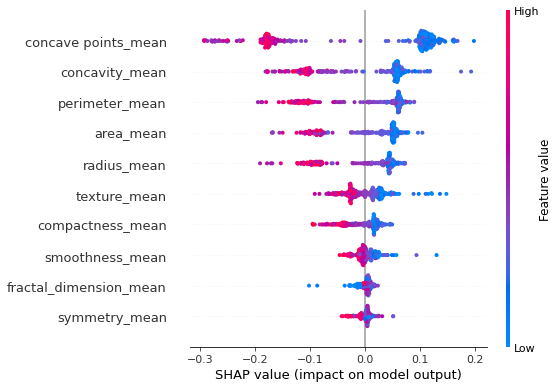

In [ ]:
#Usando o Summary_plot: Calcula as features mais importantes 
shap.summary_plot(shap_values[1], Xtrain)

Vamos observar o comportamento com o dependence_plot. Com esse recurso podemos selecionar uma feature e ver como a variação dela afeta a previsão.
Selecionamos a feature "concave points_mean"

Podeos ver os exemplos dos dados de treino.

A variável selecionada fica no eixo y e a influencia da previsão no eixo x. 
Quanto maior o valor no eixo y, maior a sua influencia puxando a previsão para ser da classe 1. Se o valor em x estiver abaixo de 0.05 o modelo esta bem confiante que pode aumentar a probabilidade de ser um tumor benigno. Quando passa um pouco de 0.05 ele fica meio confuso até aproximandamente 0.10. No entanto podemos ver um padrão muito claro de como essa feature afeta a previsão 



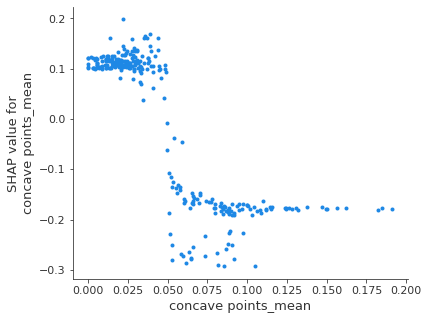

In [ ]:
shap.dependence_plot("concave points_mean", shap_values[1], Xtrain, interaction_index=None)

Vamos analisar a média do valor da área acrescentando outras variáveis para ver como ela interage para gerar previsões.

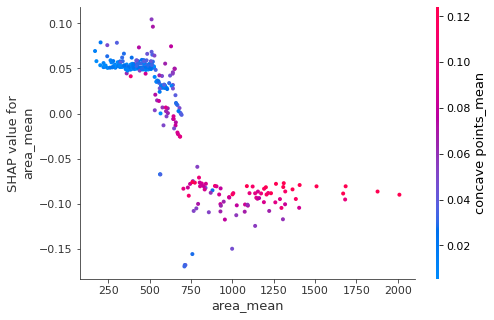

In [ ]:
shap.dependence_plot("area_mean", shap_values[1], Xtrain, interaction_index="concave points_mean")

Com essa combinação podemos extrair bastante informações.
Podemos ver no eixo x a primeira variável ("area_mean") e as cores dos seus pontos estão relacionadas ao valor da variável escolhida como interação ("concave points_mean").
Qual o poder disso?
Podemos notar que a média da área menor gera uma probabilidade maior de ser um tumor benigno e que ela esta diretamente relacioanda com váriável concave points. Conseguimos ver que tanto o concave points quanto a area são baixos em exemplos em que o modelo atribui uma maior probabilidade de serem benignos.

O contrário acontece quando a área crescea média de pontos concavos também vai crescendo e até certo ponto ele indica a probabilidade de o tumor ser benigno se torna menor 